In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans 

In [2]:
df = pd.read_csv('Train.csv')

In [3]:
df.shape

(8068, 11)

In [4]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [6]:
df.isna().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
X = df.copy()

In [9]:
X = X.drop(columns=['ID','Var_1'])

In [10]:
X.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,D
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,A
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,B
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,A


Binning

In [11]:
# def age_group(age):
#     if age < 30:
#         return 'Young'
#     elif age < 55:
#         return 'Middle'
#     else:
#         return 'Senior'

In [12]:
X['Work_Experience'] = X['Work_Experience'].fillna(0)
X['Profession'] = X['Profession'].fillna(X['Profession'].mode()[0])
X['Family_Size'] = X['Family_Size'].fillna(X['Family_Size'].median())
X['Ever_Married'] = X['Ever_Married'].fillna('No')
X['Graduated'] = X['Graduated'].fillna('No')

In [13]:
def work_exp_group(x):
    if x == 0: return 'None'
    elif x < 5: return 'Low'
    elif x < 10: return 'Mid'
    else: return 'High'
X['WorkExp_Group'] = X['Work_Experience'].apply(work_exp_group)


In [14]:
def family_size_group(size):
    if size <= 2:
        return 'Small'
    elif size <= 4:
        return 'Medium'
    else:
        return 'Large'

X['Family_Group'] = X['Family_Size'].apply(family_size_group)


In [15]:
X = X.drop(columns=['Family_Size', 'Work_Experience','Segmentation','Graduated'])

In [16]:
X.isnull().sum()

Gender            0
Ever_Married      0
Age               0
Profession        0
Spending_Score    0
WorkExp_Group     0
Family_Group      0
dtype: int64

In [17]:
X.head()

,Gender,Ever_Married,Age,Profession,Spending_Score,WorkExp_Group,Family_Group
0,Male,No,22,Healthcare,Low,Low,Medium
1,Female,Yes,38,Engineer,Average,None,Medium
2,Female,Yes,67,Engineer,Low,Low,Small
3,Male,Yes,67,Lawyer,High,None,Small
4,Female,Yes,40,Entertainment,High,None,Large


Encoding


In [18]:
X_encoded = pd.get_dummies(X, drop_first=True)

In [19]:
X_encoded = X_encoded.astype(int)
X_encoded

,Age,Gender_Male,Ever_Married_Yes,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Spending_Score_High,Spending_Score_Low,WorkExp_Group_Low,WorkExp_Group_Mid,WorkExp_Group_None,Family_Group_Medium,Family_Group_Small
0,22,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0
1,38,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0
2,67,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1
3,67,1,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1
4,40,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8063,22,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
8064,35,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0
8065,33,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1
8066,27,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0


CluChoosing optimal k using Elbow Method

In [20]:
n_cluster = range(1,30)
wcss = []
for i in n_cluster:
    model = KMeans(n_clusters=i)
    model.fit(X_encoded)
    wcss.append(model.inertia_)

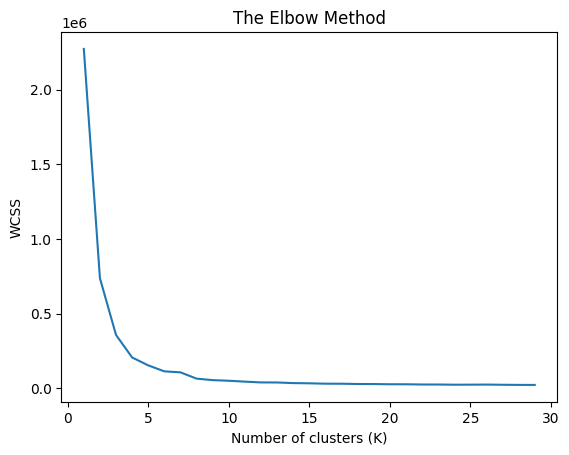

In [21]:
plt.plot(n_cluster, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.show()

In [23]:
for k in [5, 6, 7, 8, 9, 10]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_encoded)
    score = silhouette_score(X_encoded, labels)
    print(f"K = {k} --> Silhouette Score = {score:.4f}")


K = 5 --> Silhouette Score = 0.4830
K = 6 --> Silhouette Score = 0.4889
K = 7 --> Silhouette Score = 0.4346
K = 8 --> Silhouette Score = 0.4595
K = 9 --> Silhouette Score = 0.4417
K = 10 --> Silhouette Score = 0.4251


In [27]:
final=KMeans(n_clusters=6)
final.fit(X_encoded)

KMeans(n_clusters=6)

In [28]:
df['cluster'] = final.labels_